## Q1. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv("D:/Excelr Files/crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
data.shape

(50, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
data[data.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [8]:
type(data)

pandas.core.frame.DataFrame

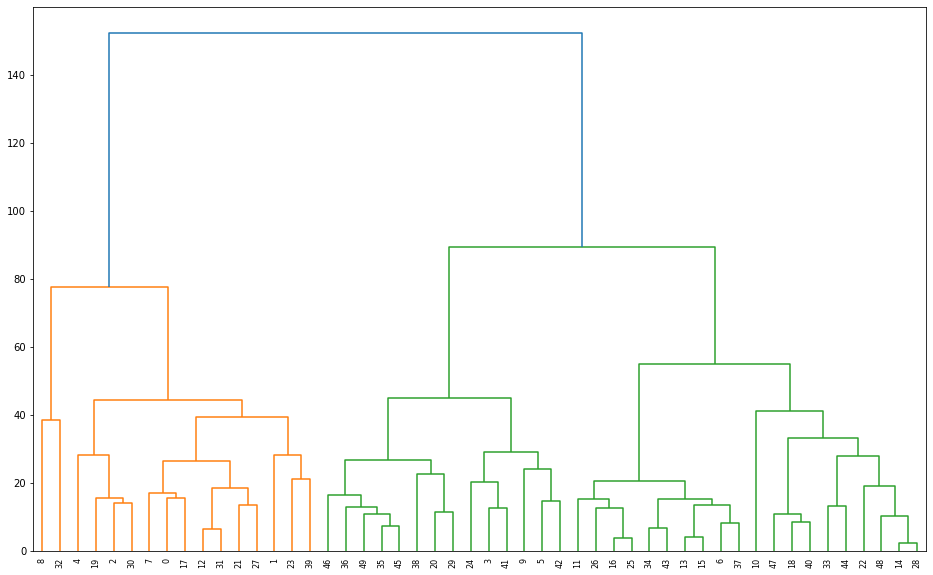

In [9]:
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(data, method='average'))

In [10]:
# Agglomerative Clustering

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [11]:
# save clusters for chart
y_hc = hc.fit_predict(data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,0
4,1
5,0
6,4
7,1
8,3
9,0


In [12]:
data1 = pd.concat([data,Clusters], axis=1)
data1

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,4
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [13]:
data1.sort_values("Clusters")

,Murder,Assault,UrbanPop,Rape,Clusters
24,9.0,178,70,28.2,0
46,4.0,145,73,26.2,0
45,8.5,156,63,20.7,0
42,12.7,201,80,25.5,0
41,13.2,188,59,26.9,0
38,3.4,174,87,8.3,0
36,4.9,159,67,29.3,0
35,6.6,151,68,20.0,0
29,7.4,159,89,18.8,0
20,4.4,149,85,16.3,0


# Kmeans

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [15]:
crime=pd.read_csv("D:/Excelr Files/crime_data.csv")

In [16]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [17]:
crime.shape

(50, 4)

In [18]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [19]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [20]:
crime[crime.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [21]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [22]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(crime)

KMeans(n_clusters=14, random_state=0)

In [23]:
kmeans.inertia_

6297.229833333333

In [24]:
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime)
    wcss.append(kmeans.inertia_)
    wcss

C:\Users\Dhanashree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


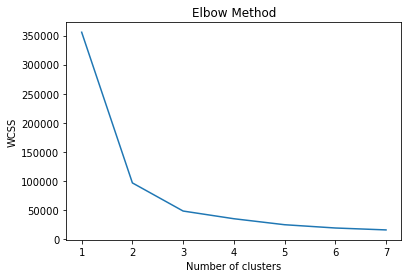

In [25]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
#Build Cluster algorithm

from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(crime)

KMeans(n_clusters=7, random_state=0)

In [27]:
clusters_new.labels_

array([0, 0, 4, 2, 4, 2, 1, 0, 5, 2, 6, 1, 0, 1, 6, 1, 1, 0, 6, 4, 3, 0,
       6, 0, 2, 1, 1, 0, 6, 3, 4, 0, 5, 6, 1, 3, 3, 1, 3, 4, 6, 2, 2, 1,
       6, 3, 3, 6, 6, 3])

In [28]:
# Converting array to dataframe

df = pd.DataFrame(clusters_new.labels_, columns =['Cluster ID'])
df.head()

,Cluster ID
0,0
1,0
2,4
3,2
4,4


In [29]:
crime1 = pd.concat([crime,df], axis=1)
crime1

,Murder,Assault,UrbanPop,Rape,Cluster ID
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,5
9,17.4,211,60,25.8,2


In [30]:
crime1.groupby('Cluster ID').agg(['mean']).reset_index()

,Cluster ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.822222,250.555556,68.000000,28.000000
1,1,5.590000,112.400000,65.600000,17.270000
2,2,11.500000,195.333333,66.166667,27.433333
3,3,5.750000,156.750000,74.000000,19.400000
4,4,10.840000,286.800000,71.200000,30.800000
5,5,14.200000,336.000000,62.500000,24.000000
6,6,2.950000,62.700000,53.900000,11.510000


In [31]:
crime1['Cluster ID'].value_counts()

1    10
6    10
0     9
3     8
2     6
4     5
5     2
Name: Cluster ID, dtype: int64

# DBSCAN

In [32]:
from sklearn.cluster import  DBSCAN
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [33]:
crim=pd.read_csv("D:/Excelr Files/crime_data.csv")

In [34]:
# droping "unnamed" colums

crim.drop(["Unnamed: 0"],axis=1,inplace=True)
crim.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [35]:
crim.shape

(50, 4)

In [36]:
crim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [37]:
crim.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [38]:
crim[crim.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [39]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset

crim_norm=StandardScaler().fit_transform(crim)
crim_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [40]:
# DBSCAN Clustering

dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crim_norm)

DBSCAN(eps=1, min_samples=4)

In [41]:
#Noisy samples are given the label -1.

dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [42]:
# Adding clusters(column) to dataset

data['clusters']=dbscan.labels_
data.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [43]:
data1=data.groupby('clusters').agg(['mean']).reset_index()
data1

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


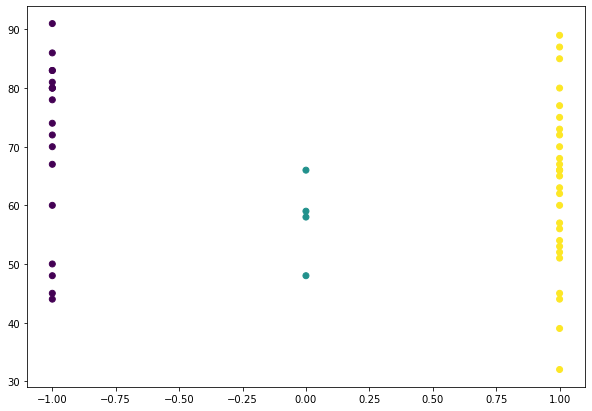

In [44]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters'],data['UrbanPop'],c=dbscan.labels_ ) 